### 데이터 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, LSTM ,Dropout

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
data=pd.read_csv(r'./data/USD_KRW.csv')
data.columns=['date', 'rate']

In [3]:
data.head()

,date,rate
0,2010-01-04,1161.0
1,2010-01-05,1147.3
2,2010-01-06,1141.4
3,2010-01-07,1132.0
4,2010-01-08,1134.1


In [4]:
data.shape

(2485, 2)

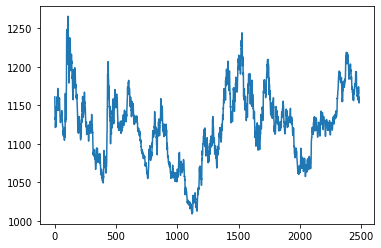

In [5]:
plt.plot(data['rate'])

In [6]:
data_1=data[['rate']]

data_1_rate=data_1['rate'].as_matrix().reshape(-1, 1)

sc_rate = MinMaxScaler()

data_1['rate'] = sc_rate.fit_transform(data_1_rate)

data_1=pd.DataFrame(data_1)
data_1.columns=['rate']

C:\Users\wsm26\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wsm26\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [7]:
data_1=pd.DataFrame(data_1)
data_1.head()

,rate
0,0.591972
1,0.538581
2,0.515588
3,0.478956
4,0.487140


### y값 생성해주기

In [8]:
data_y = data_1[["rate"]]
data_y = data_y[10:].reset_index()[["rate"]]
data_y = data_y.rename(columns = {"rate" : "y"})

In [9]:
data_y

,y
0,0.464926
1,0.445440
2,0.463367
3,0.501949
4,0.544037
...,...
2470,0.588075
2471,0.592362
2472,0.571317
2473,0.561185


In [10]:
result = pd.concat([data_1,data_y], axis=1)[:-20]
result.head()

,rate,y
0,0.591972,0.464926
1,0.538581,0.445440
2,0.515588,0.463367
3,0.478956,0.501949
4,0.487140,0.544037


In [11]:
y=result['y']

In [12]:
len(result)

2465

### 5일 데이터를 가지고 5일뒤 예측

In [13]:
d_matrix=data_1.as_matrix()

p_result =[]
for i in range(len(data_1)-20):
    for j in range(10):
        p_result.append(d_matrix[i+j])

C:\Users\wsm26\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [14]:
p_result=np.array(p_result)
p_result=p_result.reshape((len(d_matrix)-20,10,1))
p_result

array([[[0.59197194],
        [0.53858145],
        [0.51558846],
        ...,
        [0.45946999],
        [0.44427124],
        [0.44076383]],

       [[0.53858145],
        [0.51558846],
        [0.47895557],
        ...,
        [0.44427124],
        [0.44076383],
        [0.46492595]],

       [[0.51558846],
        [0.47895557],
        [0.48713952],
        ...,
        [0.44076383],
        [0.46492595],
        [0.44544037]],

       ...,

       [[0.69953235],
        [0.63367108],
        [0.63834762],
        ...,
        [0.59469992],
        [0.60249415],
        [0.59275136]],

       [[0.63367108],
        [0.63834762],
        [0.6141855 ],
        ...,
        [0.60249415],
        [0.59275136],
        [0.59158223]],

       [[0.63834762],
        [0.6141855 ],
        [0.60872954],
        ...,
        [0.59275136],
        [0.59158223],
        [0.57950117]]])

In [15]:
p_result.shape

(2465, 10, 1)

In [16]:
p_result.shape, y.shape

((2465, 10, 1), (2465,))

### train, test set 만들기

In [17]:
X_train,X_test = p_result[:int(len(p_result)*0.8)],p_result[int(len(p_result)*0.8):]
y_train,y_test = y[:int(len(p_result)*0.8)],y[int(len(p_result)*0.8):]

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1972, 10, 1), (1972,), (493, 10, 1), (493,))

### 모델 구현

In [19]:
model = Sequential()

model.add(LSTM(units=100, input_shape=(10,1)))
model.add(Dense(units=1))
model.add(Dropout(0.1))

In [20]:
model.compile(optimizer='rmsprop', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=12)

Epoch 1/100
1972/1972 [==============================] - 2s 1ms/step - loss: 0.0237
Epoch 2/100
1972/1972 [==============================] - 2s 777us/step - loss: 0.0246
Epoch 3/100
1972/1972 [==============================] - 2s 780us/step - loss: 0.0227
Epoch 4/100
1972/1972 [==============================] - 2s 792us/step - loss: 0.0227
Epoch 5/100
1972/1972 [==============================] - 2s 905us/step - loss: 0.0217
Epoch 6/100
1972/1972 [==============================] - 2s 914us/step - loss: 0.0277 
Epoch 7/100
1972/1972 [==============================] - 2s 1ms/step - loss: 0.0213
Epoch 8/100
1972/1972 [==============================] - 2s 802us/step - loss: 0.0223
Epoch 9/100
1972/1972 [==============================] - 2s 777us/step - loss: 0.0229
Epoch 10/100
1972/1972 [==============================] - 2s 805us/step - loss: 0.0222
Epoch 11/100
1972/1972 [==============================] - 2s 778us/step - loss: 0.0222
Epoch 12/100
1972/1972 [==============================]

Epoch 95/100
1972/1972 [==============================] - 1s 650us/step - loss: 0.0241
Epoch 96/100
1972/1972 [==============================] - 2s 832us/step - loss: 0.0175
Epoch 97/100
1972/1972 [==============================] - 2s 882us/step - loss: 0.0222
Epoch 98/100
1972/1972 [==============================] - 1s 717us/step - loss: 0.0227
Epoch 99/100
1972/1972 [==============================] - 1s 657us/step - loss: 0.0238
Epoch 100/100
1972/1972 [==============================] - 1s 638us/step - loss: 0.0229


### 예측

In [21]:
predicted = model.predict(X_test)
predicted.shape , y_test.shape

((493, 1), (493,))

In [22]:
predicted

array([[0.22279945],
       [0.20799577],
       [0.19950287],
       [0.20244218],
       [0.18856691],
       [0.19040869],
       [0.21025705],
       [0.22029918],
       [0.22197407],
       [0.20680782],
       [0.18731543],
       [0.19798708],
       [0.20019563],
       [0.21139121],
       [0.21317694],
       [0.2107926 ],
       [0.21440677],
       [0.22507818],
       [0.20476368],
       [0.20323622],
       [0.19330193],
       [0.21823147],
       [0.22384125],
       [0.21750814],
       [0.22725639],
       [0.24292845],
       [0.28716296],
       [0.30602938],
       [0.27031276],
       [0.28196532],
       [0.300625  ],
       [0.2697311 ],
       [0.26341188],
       [0.25460297],
       [0.21440068],
       [0.21724267],
       [0.23503035],
       [0.260947  ],
       [0.24918741],
       [0.23288497],
       [0.22397141],
       [0.25880525],
       [0.2597886 ],
       [0.2554286 ],
       [0.23955551],
       [0.21664253],
       [0.21318606],
       [0.215

In [23]:
y_test

1972    0.225253
1973    0.217069
1974    0.220966
1975    0.203819
1976    0.208106
          ...   
2460    0.602494
2461    0.592751
2462    0.591582
2463    0.579501
2464    0.579501
Name: y, Length: 493, dtype: float64

### 성능 평가

In [24]:
RMSE = mean_squared_error(y_test, predicted)**0.5    
print("RMSE =" ,RMSE)

RMSE = 0.048864983379587126


In [25]:
error = y_test.values - predicted.reshape(1,-1)
print("std ={}" .format(np.std(error)))

std =0.02312492335317461


In [26]:
predicted_original=sc_rate.inverse_transform(predicted)
predicted_original.shape

(493, 1)

In [27]:
actual=data[len(X_train)+1:].reset_index()

In [28]:
actual

,index,date,rate
0,1973,2017-12-18,1090.5
1,1974,2017-12-19,1087.2
2,1975,2017-12-20,1085.9
3,1976,2017-12-21,1081.7
4,1977,2017-12-22,1080.4
...,...,...,...
507,2480,2020-01-10,1160.0
508,2481,2020-01-13,1161.1
509,2482,2020-01-14,1155.7
510,2483,2020-01-15,1153.1


### 시각화

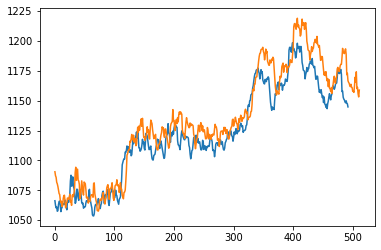

In [29]:
plt.plot(predicted_original)
plt.plot(actual['rate'])